In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('Final_Train.xlsx')

In [3]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
train.shape

(5961, 7)

We have 5961 rows and 7 columns.

In [6]:
dtype=train.dtypes.reset_index()
dtype.columns=['Column','Datatype']
dtype

,Column,Datatype
0,Qualification,object
1,Experience,object
2,Rating,object
3,Place,object
4,Profile,object
5,Miscellaneous_Info,object
6,Fees,int64


In [7]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Rating column, Place column and Miscellaneous_Info has null values.

In [8]:
train['Qualification'].value_counts()

BDS                                                                        488
BHMS                                                                       477
BAMS                                                                       471
MBBS                                                                       334
MBBS, MS - ENT                                                             220
                                                                          ... 
MBBS, PG Certificate Course In Diabetes Education(PGDCE)                     1
MBBS, MD - Dermatology, DNB, Fellowship in Dermatological Laser Surgery      1
BAMS, MS - Ayurvedic Ophthalmology                                           1
MBBS, DDVL, F.C.P.S (Dermatology)                                            1
Diploma in Otorhinolaryngology (DLO), MBBS, MRCS (UK)                        1
Name: Qualification, Length: 1420, dtype: int64

In [9]:
#Checking for the number of qualifications the doctors hold so as to able to know how many separate columns are needed to separate the qualification.
max_qual=train['Qualification'].apply(lambda x: len(x.split(',')))
print('Total maximum number of qualifications that doctors hold is: ',max_qual.max())
print('Those qualIfications are as follows: ',train.Qualification[max_qual.idxmax()])

Total maximum number of qualifications that doctors hold is:  10
Those qualIfications are as follows:  Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


In [10]:
#Minimum number of qualfications that a doctor holds
min_qual=train['Qualification'].apply(lambda x: len(x.split(',')))
print('Total minimum number of qualifications that a doctor holds:',min_qual.min())
print('Those qualifications are :',train['Qualification'][min_qual.idxmin()])

Total minimum number of qualifications that a doctor holds: 1
Those qualifications are : BAMS


# Visualization

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


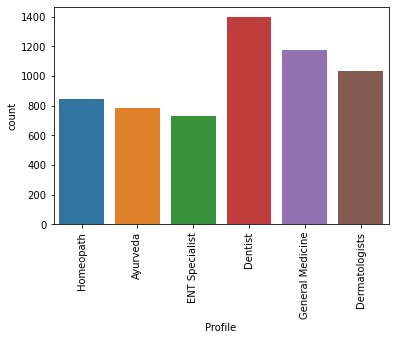

In [11]:
sns.countplot(train['Profile'])
plt.xticks(rotation=90)
print(train['Profile'].value_counts())

1. The highest count is for Dentist at 1397.
2. Lowest count is for ENT Specialist at 728.

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
60 years experience      1
64 years experience      1
65 years experience      1
58 years experience      1
66 years experience      1
Name: Experience, Length: 64, dtype: int64


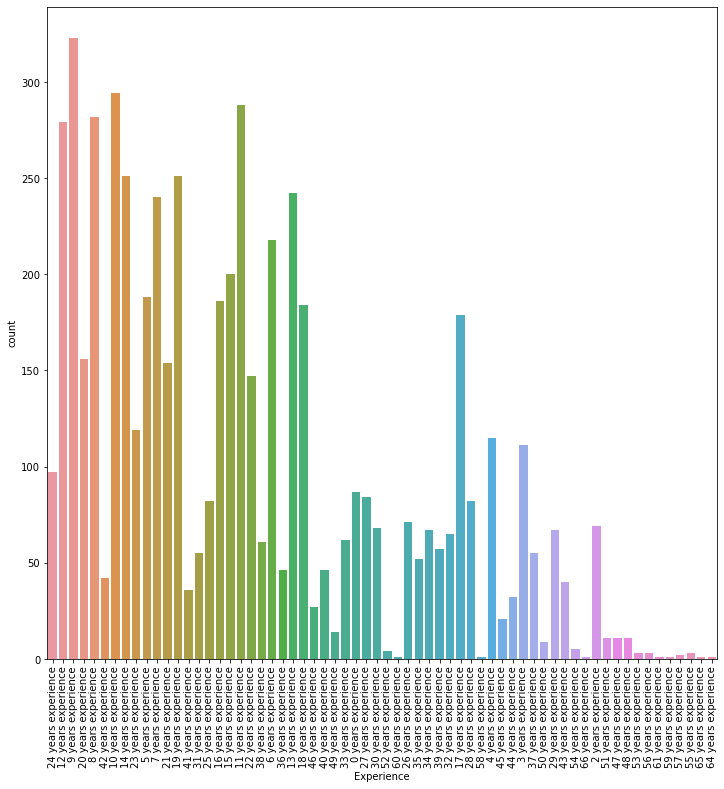

In [12]:
plt.figure(figsize=(12,12))
sns.countplot(train['Experience'])
plt.xticks(rotation=90)
print(train['Experience'].value_counts())

1. We can observe that most of the doctors have 9 years of exprerience.
2. Maximum experience that a doctor holds is of 66 years.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

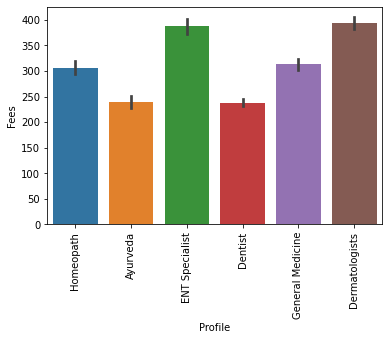

In [13]:
sns.barplot(x='Profile',y='Fees',data=train)
plt.xticks(rotation=90)

we observe that for Dermatologist and Ent Specialist the fees is the highest.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

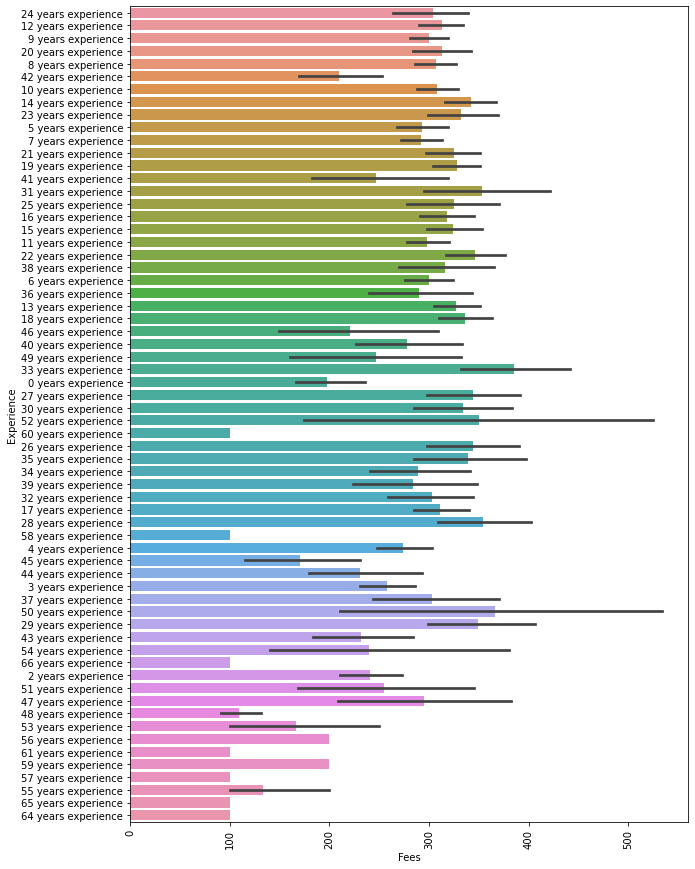

In [14]:
plt.figure(figsize=(10,15))
sns.barplot(x='Fees',y='Experience',data=train)
plt.xticks(rotation=90)

We see that even a doctor with 60 years of experience charges only 100. A doctor with 2 years of experience charges above 200. So experience along with profile of the doctor might be contributing to the fees.

In [15]:
#The qualification column is very inconsistent lets reform the entries of the column and remove the inconsitencies.
import re
def sort(t):
    srt=re.sub(r'\([^()]+\)',lambda x:x.group().replace(',','-'),t) 
    return ','.join(sorted(srt.lower().replace(' ','').split(',')))

In [16]:
train['Qualification']=train['Qualification'].apply(lambda x:sort(x))

In [17]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,mbbs,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,mbbs,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"mbbs,md-generalmedicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Now the qualification column is in a particular format.

In [18]:
#Lets separate all the qualifications of the doctors and put them in a list.
def unique(a):
    qualifications=''
    for i in a:
       qualifications += i+','
    return qualifications

In [19]:
list=unique(train['Qualification'])

In [20]:
#Now for the above list lets count the number of times each degree appears in the dataset.
from collections import Counter

In [21]:
count=pd.DataFrame.from_dict(dict(Counter(list.split(',')).most_common()),orient='index').reset_index()
count.columns=['Qualifications','Counts']
count.head(10)

,Qualifications,Counts
0,mbbs,2808
1,bds,1363
2,bams,764
3,bhms,749
4,md-dermatology,606
5,ms-ent,411
6,venereology&leprosy,297
7,md-generalmedicine,285
8,diplomainotorhinolaryngology(dlo),250
9,md-homeopathy,181


Some doctors bear single degree others have more than one. So it would be better if we sort the qualification column into different columns to make us understand exactly how many degrees the doctor holds. At the end it is about the exprericne and degrees that sums up to decide the fees of the doctor. for that lets first encode the above qualifications.

In [22]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
count['Qual_Code']=le.fit_transform(count['Qualifications'].astype('category'))
count.head(10)

,Qualifications,Counts,Qual_Code
0,mbbs,2808,502
1,bds,1363,27
2,bams,764,25
3,bhms,749,29
4,md-dermatology,606,535
5,ms-ent,411,645
6,venereology&leprosy,297,783
7,md-generalmedicine,285,540
8,diplomainotorhinolaryngology(dlo),250,216
9,md-homeopathy,181,543


In [23]:
#Dictionary to save the Qualification and respective code only so we can use these codes further to encode the degrees to avoid a degree bearing more than one encoding.
dict_qual=dict(zip(count['Qualifications'],count['Qual_Code']))
dict_qual

{'mbbs': 502,
 'bds': 27,
 'bams': 25,
 'bhms': 29,
 'md-dermatology': 535,
 'ms-ent': 645,
 'venereology&leprosy': 783,
 'md-generalmedicine': 540,
 'diplomainotorhinolaryngology(dlo)': 216,
 'md-homeopathy': 543,
 'ddvl': 144,
 'md-ayurvedamedicine': 527,
 'ddv': 142,
 'dnb-ent': 270,
 'mds-conservativedentistry&endodontics': 581,
 'mds-oral&maxillofacialsurgery': 586,
 'ms-otorhinolaryngology': 651,
 'dnb-dermatology&venereology': 268,
 'mds': 580,
 'mds-prosthodontics': 603,
 'md-medicine': 549,
 'md-internalmedicine': 547,
 'mds-orthodontics': 593,
 'diplomaindermatology': 176,
 'dnb': 265,
 'postgraduatediplomaindiabetology(pgdd)': 744,
 'dhms(diplomainhomeopathicmedicineandsurgery)': 150,
 'mds-periodontologyandoralimplantology': 600,
 'mds-paedodonticsandpreventivedentistry': 596,
 'mds-periodontics': 598,
 'dvd': 303,
 'mds-prosthodontistandcrownbridge': 605,
 'dnb-otorhinolaryngology': 281,
 'mds-orthodonticsanddentofacialorthopaedics': 594,
 'ms-generalsurgery': 646,
 'dnb-g

As in the qualification column data is not in a proper manner we can see some fo the entries 'BAMS, MD - Ayurveda Medicine' , 'BSc - Zoology, BAMS' now if we separate the degrees one in each columns and then encode BAMS would end up having different codes which would make it difficult for the machine to link BAMS to a particular code. For that we gave in the above dictionary a particular code to be assigned to a particular qualification.

In [24]:
#splitting different qualifications into different columns:
for i in range(0,max_qual.max()):
    train["Qualification"+str(i+1)]=train['Qualification'].str.split(',').str[i]

In [25]:
train.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bams,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bhms,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,bhms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bds,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,bds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"mbbs,md-generalmedicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"bds,bsc",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100,bds,bsc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have columns Qualification1-Qualification10 which bears entries based on how many degrees the doctor holds.

In [26]:
train['Experience'].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
60 years experience      1
64 years experience      1
65 years experience      1
58 years experience      1
66 years experience      1
Name: Experience, Length: 64, dtype: int64

In [27]:
train.groupby('Profile')['Qualification'].value_counts()

Profile    Qualification                                      
Ayurveda   bams                                                   470
           bams,md-ayurvedamedicine                               100
           bams,ms-ayurveda                                        19
           md-ayurvedamedicine                                     12
           bams,md-ayurvedamedicine,phd-ayurveda                    4
                                                                 ... 
Homeopath  gceh                                                     1
           m.d.(e.h)                                                1
           mbbs,md-homeopathy                                       1
           mbs(h),md-homeopathy                                     1
           md-homeopathy,pgdiplomainclinicalcosmetology(pgdcc)      1
Name: Qualification, Length: 1313, dtype: int64

We see for profile ayurveda-bams is the repetative qualification.

In [28]:
#Converting experience to numeric
train['Experience']=train['Experience'].str.rstrip('years experience').astype('int')

In [29]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now lets plot experience with few other columns to see the link if any between the columns.

Profile    Experience
Ayurveda   10            50
           8             49
           9             46
           7             36
           11            36
                         ..
Homeopath  43             2
           44             2
           45             1
           48             1
           50             1
Name: Experience, Length: 311, dtype: int64


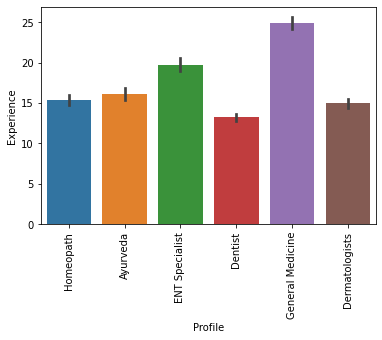

In [30]:
#plot of Profile and Experience
sns.barplot(x='Profile',y='Experience',data=train)
plt.xticks(rotation=90)
print(train.groupby('Profile')['Experience'].value_counts())

Highest experienced doctors are from General Medicines.
Lowest experienced are the Dentist.

In [31]:
#Converting rating to float type
train['Rating']=train['Rating'].str.rstrip('%').astype('float')/100

In [32]:
train['Rating'].dtypes

dtype('float64')

In [33]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

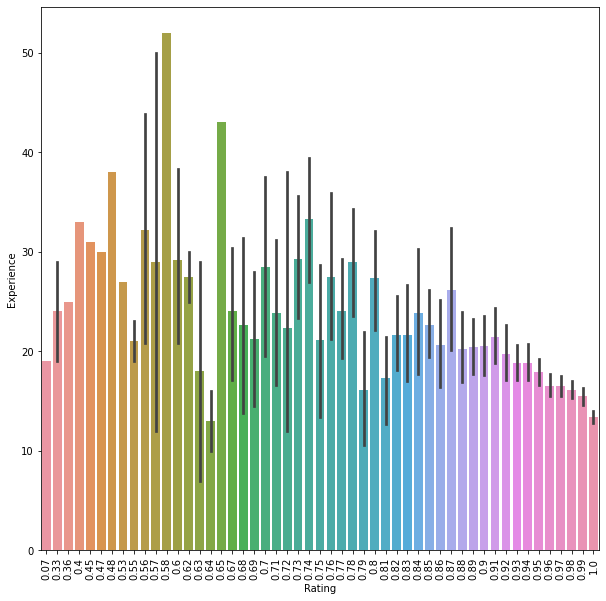

In [34]:
#plot of Rating and Experience
plt.figure(figsize=(10,10))
sns.barplot(x='Rating',y='Experience',data=train)
plt.xticks(rotation=90)

A negative relationship can be observed between experience and rating.

In [35]:
train['Rating'].isnull().sum()

3302

In [36]:
#we have null values in Rating column. Lets see which one of - mean, median can be used to treat null values.
train.skew()

Experience    0.991089
Rating       -3.277801
Fees          0.751870
dtype: float64

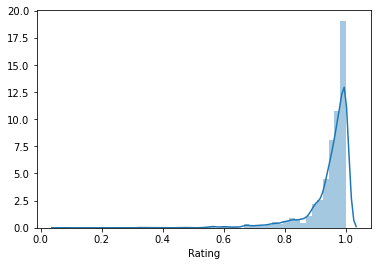

In [37]:
sns.distplot(train['Rating'])

In [38]:
#Rating is left skewed we fill the null values with median.
train['Rating'].median()

0.97

In [39]:
train['Rating']=train['Rating'].fillna(0)

In [40]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Qualification1           0
Qualification2        1962
Qualification3        4591
Qualification4        5589
Qualification5        5845
Qualification6        5928
Qualification7        5949
Qualification8        5956
Qualification9        5957
Qualification10       5960
dtype: int64

In [41]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33,0.00,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Place too have 25 null values and  place being a categorical data we replace the null values with mode.
train['Place'].mode()

0    HSR Layout, Bangalore
dtype: object

In [43]:
train['Place']=train['Place'].fillna('HSR Layout, Bangalore')

In [44]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33,0.00,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Qualification1           0
Qualification2        1962
Qualification3        4591
Qualification4        5589
Qualification5        5845
Qualification6        5928
Qualification7        5949
Qualification8        5956
Qualification9        5957
Qualification10       5960
dtype: int64

In [46]:
#Splitting the column place into two separate columns bearing locality name and city name separately.
train['Locality']=train['Place'].str.split(',').str[0]
train['City']=train['Place'].str.split(',').str[1]

In [47]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore
5957,mbbs,33,0.00,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai


In [48]:
train.Miscellaneous_Info[0:10]

0                 100% 16 Feedback Kakkanad, Ernakulam
1                98% 76 Feedback Whitefield, Bangalore
2                                                  NaN
3    Bannerghatta Road, Bangalore ₹250 Available on...
4                100% 4 Feedback Keelkattalai, Chennai
5                                                  NaN
6                                                  NaN
7    Dental Fillings Crowns and Bridges Fixing Impa...
8                                                  NaN
9                                                  NaN
Name: Miscellaneous_Info, dtype: object

1. This information column has nan entries.
2. Few rows gives the information about the profile of the doctor.
3. Few rows only tells us about the fess of the doctor. 
4. Few rows gives us the rating with the number of people rated along with the area.

In [49]:
#Lets try to modify this column to make it an informative one. As we can see the presence of rupee sign ₹ in the data the program cannot understand these signs lets convert it to INR.
train['Miscellaneous_Info']=train['Miscellaneous_Info'].str.replace('₹','INR ')

In [50]:
train.Miscellaneous_Info[train.Miscellaneous_Info.str.contains('INR',na=False)].sample(10)

2796    Kammana Halli, Bangalore INR 500 Visits Tomorrow
822            7 Feedback Mira Bhayandar, Mumbai INR 200
4481                    2 Feedback Dwarka, Delhi INR 500
1556           2 Feedback Indiranagar, Bangalore INR 500
1536      Mahim, Mumbai INR 800 Available on Fri, 08 Feb
3345               1 Feedback Kalkere, Bangalore INR 400
3468            Kondapur, Hyderabad INR 200 Visits Today
2842                   5 Feedback Kalkaji, Delhi INR 200
1077                1 Feedback Chembur, Mumbai INR 1,200
5537     Shalimar Bagh, Delhi INR 700 Available Tomorrow
Name: Miscellaneous_Info, dtype: object

In [51]:
#Defining a function to extract the fees value from the Miscellaneous Info
def fee_info(a):
    list=re.search(r'INR (\d*)',a)
    if list:
        return int(list.group(1))
    else:
        return 0

In [52]:
train['Misc_Info_Fees']=train['Miscellaneous_Info'].apply(lambda x: fee_info(x) if "INR" in str(x) else 0)

In [53]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam,0
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore,0
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore,0
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore,250
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore,0
5957,mbbs,33,0.00,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai,0
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi,0
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai,0


In [54]:
#Using number of feedbacks and making a separate column for the number of feedbacks received
def feed(num):
    fdbk=re.search(r' (.*?) Feedback',num)
    if fdbk:
        return int(fdbk.group(1))
    else:
        return 0

In [55]:
train['No_of_Feedback']=train['Miscellaneous_Info'].apply(lambda x:feed(x) if '%' in str(x) else 0)

In [56]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam,0,16
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore,0,76
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,mbbs,ms-otorhinolaryngology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore,0,0
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,bams,bsc-zoology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore,250,0
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,bams,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,mbbs,ms-ent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore,0,45
5957,mbbs,33,0.00,"Nungambakkam, Chennai",General Medicine,NaN,100,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai,0,0
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi,0,11
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,mbbs,md-generalmedicine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai,0,0


In [57]:
#Encoding all the qualification columns from 1 to 10 using the dictionary we created above namely dict_qual.
grp=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10']
for i in grp:
    train.replace({i:dict_qual},inplace=True)

In [58]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,29,543.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam,0,16
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,25,527.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore,0,76
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,502,651.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore,0,0
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,25,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore,250,0
4,bams,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,502,645.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore,0,45
5957,mbbs,33,0.00,"Nungambakkam, Chennai",General Medicine,NaN,100,502,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai,0,0
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,502,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi,0,11
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,502,540.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai,0,0


In [59]:
# Encoding categorical columns:
bin=['Profile','City','Locality']
for i in bin:
    train[i]=le.fit_transform(train[i].astype('str'))

In [60]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam",100,29,543.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296,4,0,16
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore",350,25,527.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,855,0,0,76
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",3,NaN,300,502,651.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,452,0,0,0
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore INR 250 Available...",250,25,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68,0,250,0
4,bams,20,1.00,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai",250,25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",3,"98% 45 Feedback Basavanagudi, Bangalore",300,502,645.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70,0,0,45
5957,mbbs,33,0.00,"Nungambakkam, Chennai",4,NaN,100,502,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,535,1,0,0
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",4,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,502,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,215,3,0,11
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",4,General Medical Consultation Viral Fever Treat...,100,502,540.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,840,6,0,0


In [61]:
#Checking for the missing values in the data
train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Qualification1           0
Qualification2        1962
Qualification3        4591
Qualification4        5589
Qualification5        5845
Qualification6        5928
Qualification7        5949
Qualification8        5956
Qualification9        5957
Qualification10       5960
Locality                 0
City                     0
Misc_Info_Fees           0
No_of_Feedback           0
dtype: int64

We will treat the null values in the qualification columns only. Miscellaneous_Info column would be dropped as we have extracted whatever numerical information it had.

In [62]:
group=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10']
for i in group:
    train[i].fillna(-1,inplace=True)

In [63]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,"bhms,md-homeopathy",24,1.00,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam",100,29,543.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,296,4,0,16
1,"bams,md-ayurvedamedicine",12,0.98,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore",350,25,527.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,855,0,0,76
2,"mbbs,ms-otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",3,NaN,300,502,651.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,452,0,0,0
3,"bams,bsc-zoology",12,0.00,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore INR 250 Available...",250,25,35.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,68,0,250,0
4,bams,20,1.00,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai",250,25,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,335,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,0.98,"Basavanagudi, Bangalore",3,"98% 45 Feedback Basavanagudi, Bangalore",300,502,645.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,70,0,0,45
5957,mbbs,33,0.00,"Nungambakkam, Chennai",4,NaN,100,502,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,535,1,0,0
5958,mbbs,41,0.97,"Greater Kailash Part 2, Delhi",4,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,502,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,215,3,0,11
5959,"mbbs,md-generalmedicine",15,0.90,"Vileparle West, Mumbai",4,General Medical Consultation Viral Fever Treat...,100,502,540.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,840,6,0,0


Dropping three columns : 
1. Qualification: As we have split qualification into different columns to manage the data.
2. Place: As we have split the place into locality and city.
3. Miscellaneous_Info: As we have extracted all the numeric information from the column.

In [64]:
train.drop(['Qualification','Place','Miscellaneous_Info'],axis=1,inplace=True)
train

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,24,1.00,5,100,29,543.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,296,4,0,16
1,12,0.98,0,350,25,527.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,855,0,0,76
2,9,0.00,3,300,502,651.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,452,0,0,0
3,12,0.00,0,250,25,35.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,68,0,250,0
4,20,1.00,0,250,25,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,335,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,0.98,3,300,502,645.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,70,0,0,45
5957,33,0.00,4,100,502,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,535,1,0,0
5958,41,0.97,4,600,502,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,215,3,0,11
5959,15,0.90,4,100,502,540.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,840,6,0,0


In [65]:
train.describe()

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,0.422172,2.441872,307.944640,210.035732,335.676229,129.574736,35.635799,10.788291,2.383157,0.220936,-0.444892,-0.552089,-0.870156,410.120282,3.061231,10.225466,10.339540
std,11.142798,0.473409,1.658014,190.920373,208.709105,264.501895,251.593348,147.356420,87.187050,47.142229,27.655230,19.550580,17.743966,10.024931,255.174855,2.328070,68.578416,49.607924
min,0.000000,0.000000,0.000000,5.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,150.000000,27.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,195.000000,1.000000,0.000000,0.000000
50%,14.000000,0.000000,2.000000,300.000000,142.000000,502.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,404.000000,3.000000,0.000000,0.000000
75%,23.000000,0.960000,4.000000,500.000000,502.000000,543.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,622.000000,5.000000,0.000000,1.000000
max,66.000000,1.000000,5.000000,950.000000,651.000000,786.000000,786.000000,786.000000,783.000000,785.000000,745.000000,744.000000,778.000000,773.000000,865.000000,9.000000,800.000000,1782.000000


1. Standard deviation for Qualification1, Qualification2, Qualification3, Qualification4, Locality is quite high.
2. Mean is higher than the median for every column except Locality i.e. our data is right skewed.
3. The difference between the 75th percentile and max is high in columns: Experience,Fees, Qualification2, Qualification3, Qualification4, Qualification5, Qualification6, Qualification7, Qualification8, Qualification9, Qualification10, Misc_Info_Fees, No_of_Feedback.

In [66]:
#Lets check the correlation of the columns
train.corr()

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
Experience,1.000000,-0.038569,0.202073,0.002117,0.236055,0.051682,-0.002716,-0.005706,-0.016469,-0.008928,0.009886,0.001441,-0.006144,0.005459,0.015970,0.037863,-0.032696,0.017130
Rating,-0.038569,1.000000,-0.126389,0.153273,-0.074021,0.168486,0.145127,0.118237,0.073710,0.028821,0.007086,0.016028,0.013754,0.014991,-0.036624,-0.092861,-0.128254,0.236208
Profile,0.202073,-0.126389,1.000000,0.145226,0.356060,0.019411,0.031122,0.010341,0.012249,0.023153,0.033303,0.024187,0.021308,-0.011266,0.019533,-0.013748,0.013254,0.004340
Fees,0.002117,0.153273,0.145226,1.000000,0.196981,0.231792,0.164737,0.102097,0.066650,0.026285,0.020842,-0.008059,-0.000714,-0.000539,-0.052750,-0.024793,0.117223,0.076622
Qualification1,0.236055,-0.074021,0.356060,0.196981,1.000000,0.287218,0.146706,-0.016632,-0.021617,-0.027822,-0.024970,-0.024937,-0.021404,-0.008506,0.015721,-0.022791,0.035419,0.059398
Qualification2,0.051682,0.168486,0.019411,0.231792,0.287218,1.000000,0.205274,0.018425,-0.023105,-0.023185,-0.021737,-0.022502,-0.024094,-0.011787,0.020933,-0.057055,0.015909,0.060285
Qualification3,-0.002716,0.145127,0.031122,0.164737,0.146706,0.205274,1.000000,0.334988,0.143625,0.063048,0.024934,0.008656,0.004391,-0.001214,-0.008081,-0.046294,-0.009670,0.086382
Qualification4,-0.005706,0.118237,0.010341,0.102097,-0.016632,0.018425,0.334988,1.000000,0.432880,0.210111,0.089186,0.045219,0.036139,0.006362,-0.030878,0.006599,-0.022403,0.071826
Qualification5,-0.016469,0.073710,0.012249,0.066650,-0.021617,-0.023105,0.143625,0.432880,1.000000,0.452360,0.199688,0.110775,0.092515,0.015335,-0.026276,0.014953,0.008266,0.033291
Qualification6,-0.008928,0.028821,0.023153,0.026285,-0.027822,-0.023185,0.063048,0.210111,0.452360,1.000000,0.465328,0.264385,0.235792,0.039190,0.000933,-0.002100,0.015351,0.020241


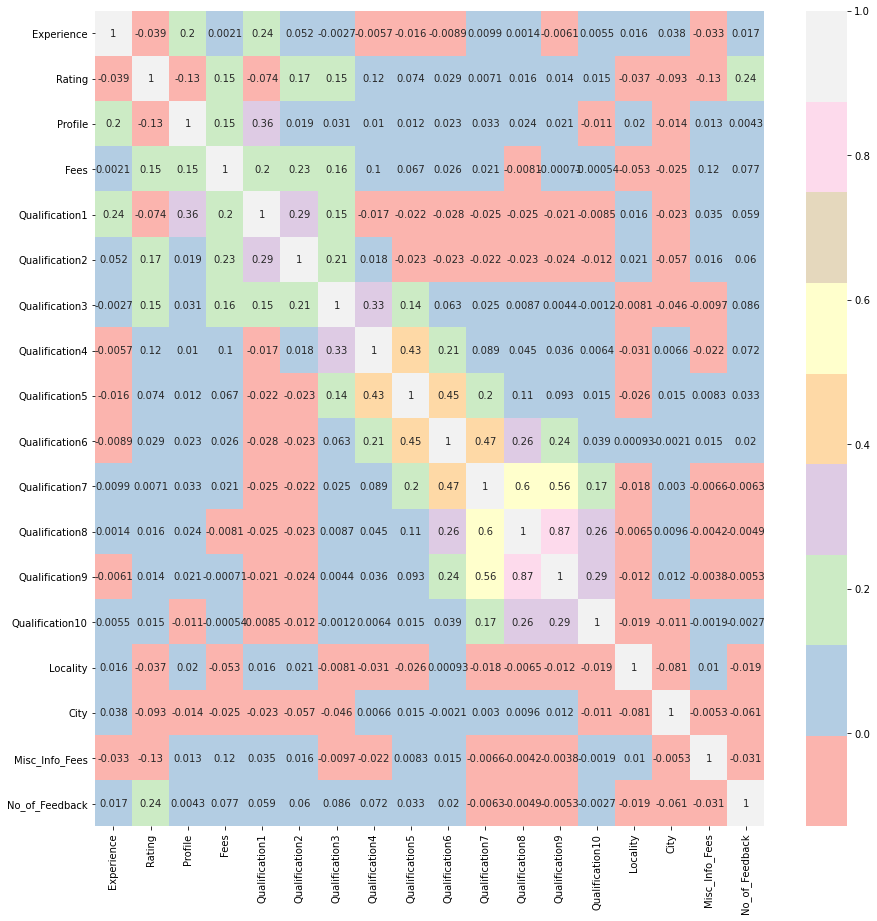

In [67]:
#Plot for correlation
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap='Pastel1')

1. Our target variable- Fees has a negative correlation with Rating.
2. Qualification8 and Qualification9 are highly positive correlated.
3. Qualification1 and Qualification2 are negativey correlated with Rating.
4. Experience and Rating are negatively correlated.

In [68]:
#checking the skewness
train.skew()

Experience          0.991089
Rating              0.247186
Profile             0.108803
Fees                0.751870
Qualification1      0.533551
Qualification2     -0.305150
Qualification3      1.546716
Qualification4      3.961022
Qualification5      7.570427
Qualification6     14.475610
Qualification7     23.246721
Qualification8     36.084163
Qualification9     40.909202
Qualification10    77.207513
Locality            0.121186
City                0.054003
Misc_Info_Fees      7.858463
No_of_Feedback     15.549863
dtype: float64

As we can see the data is highly skewed. Lets also analyse the skewness and distribution of the data using distplot.

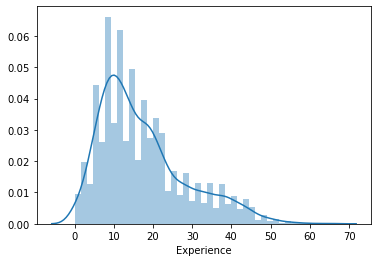

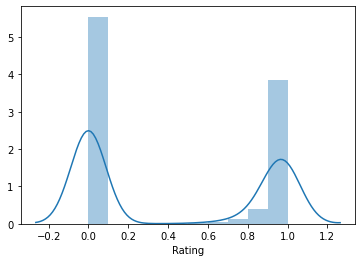

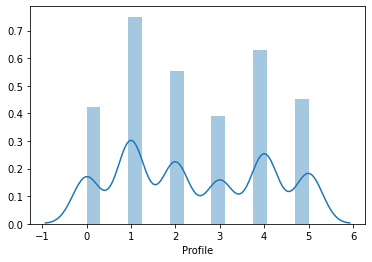

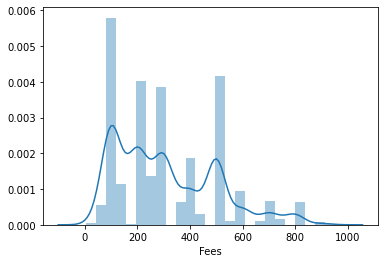

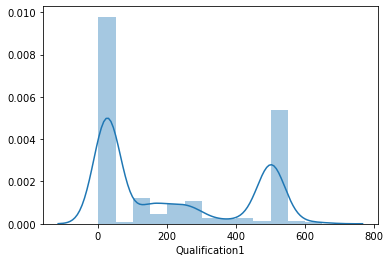

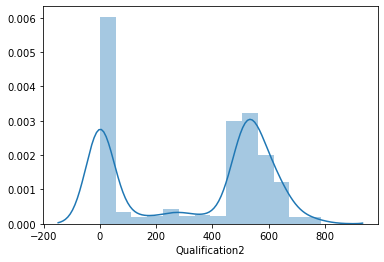

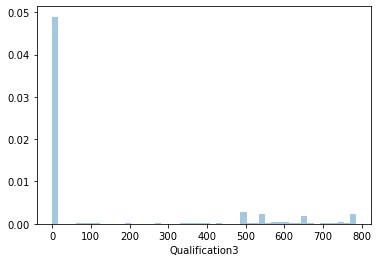

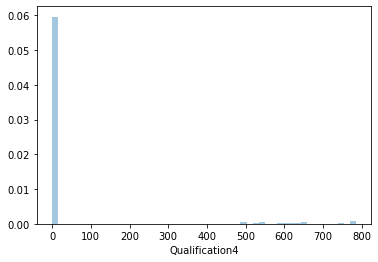

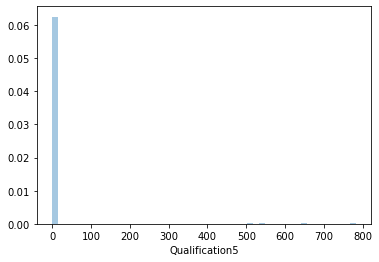

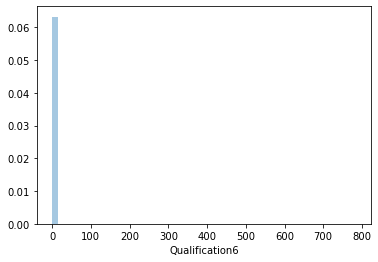

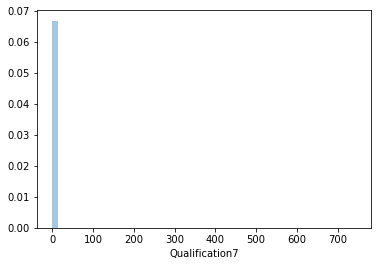

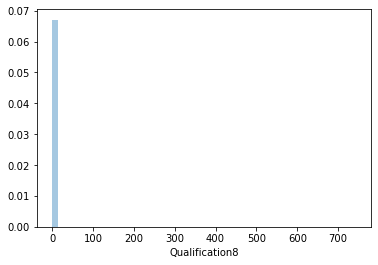

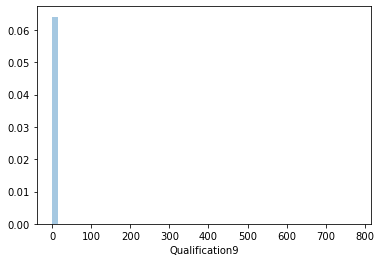

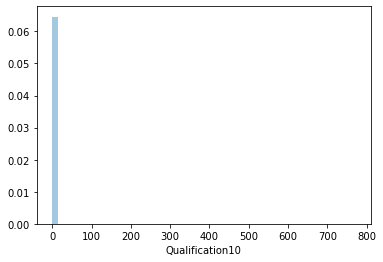

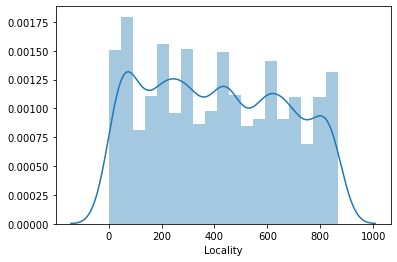

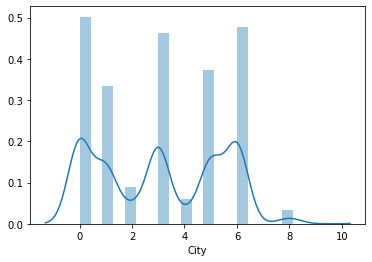

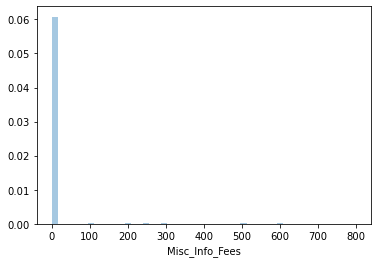

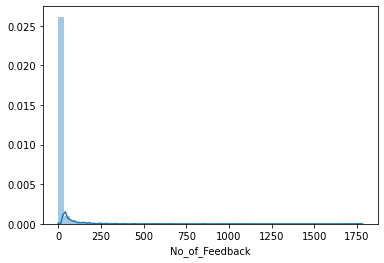

In [69]:
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

1. We can observe that Experience, Fees are right skewed.
2. Rating is left skewed.
3. Profile is a categorical data with categories from 0 to 6.
4. Qualification4-Qualification10 has only a few entries rest we have replaced the null values with 0 so we can see a bar at 0.
5. Locality is spread between 0-800.
6. city is a categorical data with peaks at 0,3 and 6.
7. Misc_Info_Fees was the fees record extracted form the Miscellaneous_Info

In [70]:
#Removing skewness using power transformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [71]:
for i in train.skew().index:
    if train.skew().loc[i]>0.55:
        train[i]=pt.fit_transform(train[i].values.reshape(-1,1))
    if train.skew().loc[i]<-0.55:
        train[i]=pt.fit_transform(train[i].values.reshape(-1,1))
    else:
        train[i]=train[i]

In [72]:
train

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,0.737357,1.00,5,-1.295637,29,543.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,296,4,-0.182920,1.812378
1,-0.325180,0.98,0,0.447898,25,527.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,855,0,-0.182920,1.884852
2,-0.688374,0.00,3,0.206417,502,651.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,452,0,-0.182920,-0.575357
3,-0.325180,0.00,0,-0.068820,25,35.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,68,0,5.477811,-0.575357
4,0.430174,1.00,0,-0.068820,25,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,335,1,-0.182920,1.529781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.347478,0.98,3,0.206417,502,645.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,70,0,-0.182920,1.872602
5957,1.326351,0.00,4,-1.295637,502,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,535,1,-0.182920,-0.575357
5958,1.768994,0.97,4,1.359446,502,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,215,3,-0.182920,1.768045
5959,-0.013448,0.90,4,-1.295637,502,540.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,840,6,-0.182920,-0.575357


In [73]:
train.skew()

Experience          0.000692
Rating              0.247186
Profile             0.108803
Fees               -0.046217
Qualification1      0.533551
Qualification2     -0.305150
Qualification3      1.285585
Qualification4      3.619025
Qualification5      6.959321
Qualification6     13.331593
Qualification7     22.226125
Qualification8     34.493472
Qualification9     38.574597
Qualification10    77.207513
Locality            0.121186
City                0.054003
Misc_Info_Fees      5.285439
No_of_Feedback      1.189303
dtype: float64

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(train))

In [75]:
train_new=train[(z<3).all(axis=1)]
print('Before removing outliers shape was: ',train.shape,'\tAfter removing outliers shape is: ',train_new.shape)

Before removing outliers shape was:  (5961, 18) 	After removing outliers shape is:  (5399, 18)


In [76]:
train_new

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,0.737357,1.00,5,-1.295637,29,543.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,296,4,-0.18292,1.812378
1,-0.325180,0.98,0,0.447898,25,527.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,855,0,-0.18292,1.884852
2,-0.688374,0.00,3,0.206417,502,651.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,452,0,-0.18292,-0.575357
4,0.430174,1.00,0,-0.068820,25,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,335,1,-0.18292,1.529781
5,-0.825202,0.00,0,-1.295637,25,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,604,1,-0.18292,-0.575357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.347478,0.98,3,0.206417,502,645.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,70,0,-0.18292,1.872602
5957,1.326351,0.00,4,-1.295637,502,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,535,1,-0.18292,-0.575357
5958,1.768994,0.97,4,1.359446,502,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,215,3,-0.18292,1.768045
5959,-0.013448,0.90,4,-1.295637,502,540.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,840,6,-0.18292,-0.575357


In [77]:
train_new.skew()

Experience        -0.015782
Rating             0.253437
Profile            0.110260
Fees              -0.014897
Qualification1     0.513593
Qualification2    -0.316681
Qualification3     1.663084
Qualification4     0.000000
Qualification5     0.000000
Qualification6     0.000000
Qualification7     0.000000
Qualification8     0.000000
Qualification9     0.000000
Qualification10    0.000000
Locality           0.109939
City               0.065873
Misc_Info_Fees     0.000000
No_of_Feedback     1.222122
dtype: float64

In [78]:
x=train_new.drop(['Fees'],axis=1)
x

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,0.737357,1.00,5,29,543.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,296,4,-0.18292,1.812378
1,-0.325180,0.98,0,25,527.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,855,0,-0.18292,1.884852
2,-0.688374,0.00,3,502,651.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,452,0,-0.18292,-0.575357
4,0.430174,1.00,0,25,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,335,1,-0.18292,1.529781
5,-0.825202,0.00,0,25,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,604,1,-0.18292,-0.575357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.347478,0.98,3,502,645.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,70,0,-0.18292,1.872602
5957,1.326351,0.00,4,502,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,535,1,-0.18292,-0.575357
5958,1.768994,0.97,4,502,-1.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,215,3,-0.18292,1.768045
5959,-0.013448,0.90,4,502,540.0,-0.546193,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,840,6,-0.18292,-0.575357


In [79]:
y=train_new['Fees']
y

0      -1.295637
1       0.447898
2       0.206417
4      -0.068820
5      -1.295637
          ...   
5956    0.206417
5957   -1.295637
5958    1.359446
5959   -1.295637
5960   -0.390961
Name: Fees, Length: 5399, dtype: float64

In [80]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [81]:
x1=mns.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)
x

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,Misc_Info_Fees,No_of_Feedback
0,0.623066,1.00,1.0,0.043077,0.691233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.342197,0.444444,0.0,0.964947
1,0.435267,0.98,0.0,0.036923,0.670902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.988439,0.000000,0.0,0.994235
2,0.371074,0.00,0.6,0.770769,0.828463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.522543,0.000000,0.0,0.000000
3,0.568772,1.00,0.0,0.036923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387283,0.111111,0.0,0.850742
4,0.346890,0.00,0.0,0.036923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698266,0.111111,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,0.554156,0.98,0.6,0.770769,0.820839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080925,0.000000,0.0,0.989285
5395,0.727168,0.00,0.8,0.770769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618497,0.111111,0.0,0.000000
5396,0.805403,0.97,0.8,0.770769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248555,0.333333,0.0,0.947030
5397,0.490364,0.90,0.8,0.770769,0.687421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971098,0.666667,0.0,0.000000


In [82]:
x.skew()

Experience        -0.015782
Rating             0.253437
Profile            0.110260
Qualification1     0.513593
Qualification2    -0.316681
Qualification3     1.663084
Qualification4     0.000000
Qualification5     0.000000
Qualification6     0.000000
Qualification7     0.000000
Qualification8     0.000000
Qualification9     0.000000
Qualification10    0.000000
Locality           0.109939
City               0.065873
Misc_Info_Fees     0.000000
No_of_Feedback     1.222122
dtype: float64

In [128]:
#entries in the columns : Qualification4-10 became 0 in the rpocess of removing skewness and outliers. So we will drop them.
#No_of_Feedback as feedback is hardly giving any information of the fees.

In [125]:
#Dropping certain columns as to improve the score : 
x4=x.drop(['No_of_Feedback','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10'],axis=1)
x4

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Locality,City,Misc_Info_Fees
0,0.623066,1.00,1.0,0.043077,0.691233,0.0,0.342197,0.444444,0.0
1,0.435267,0.98,0.0,0.036923,0.670902,0.0,0.988439,0.000000,0.0
2,0.371074,0.00,0.6,0.770769,0.828463,0.0,0.522543,0.000000,0.0
3,0.568772,1.00,0.0,0.036923,0.000000,0.0,0.387283,0.111111,0.0
4,0.346890,0.00,0.0,0.036923,0.000000,0.0,0.698266,0.111111,0.0
...,...,...,...,...,...,...,...,...,...
5394,0.554156,0.98,0.6,0.770769,0.820839,0.0,0.080925,0.000000,0.0
5395,0.727168,0.00,0.8,0.770769,0.000000,0.0,0.618497,0.111111,0.0
5396,0.805403,0.97,0.8,0.770769,0.000000,0.0,0.248555,0.333333,0.0
5397,0.490364,0.90,0.8,0.770769,0.687421,0.0,0.971098,0.666667,0.0


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [126]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
for j in model:
    print('For algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x4,y,test_size=0.30,random_state=48)
    j.fit(x_train,y_train)
    predict=j.predict(x_test)
    r2=r2_score(predict,y_test)
    print('R2 Score is: ',r2)
    print('Mean absolute error: ',mean_absolute_error(predict,y_test))
    print('Mean squared error: ',mean_squared_error(predict,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))
    print('\n')

For algorithm:  LinearRegression()
R2 Score is:  -6.002763770738541
Mean absolute error:  0.7645911337613154
Mean squared error:  0.8525009050235369
Root mean squared error:  0.923309755728562


For algorithm:  DecisionTreeRegressor()
R2 Score is:  -0.38797183758556075
Mean absolute error:  0.9044920958533061
Mean squared error:  1.4878023836743455
Root mean squared error:  1.219755050686139


For algorithm:  SVR()
R2 Score is:  -1.8489480964346159
Mean absolute error:  0.7351279941160249
Mean squared error:  0.8279507385460358
Root mean squared error:  0.9099179845162068


For algorithm:  KNeighborsRegressor()
R2 Score is:  -1.5837189474541598
Mean absolute error:  0.7567830570178492
Mean squared error:  0.8827530275343443
Root mean squared error:  0.9395493747187235




In [129]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
model=[RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),Ridge(),Lasso(),ElasticNet()]
for j in model:
    print('For algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x4,y,test_size=0.30,random_state=48)
    j.fit(x_train,y_train)
    predict=j.predict(x_test)
    r2=r2_score(predict,y_test)
    print('R2 Score is: ',r2)
    print('Mean absolute error: ',mean_absolute_error(predict,y_test))
    print('Mean squared error: ',mean_squared_error(predict,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))
    print('\n')

For algorithm:  RandomForestRegressor()
R2 Score is:  -1.6161862989807885
Mean absolute error:  0.7088392332646622
Mean squared error:  0.7872890126180483
Root mean squared error:  0.887293081579051


For algorithm:  GradientBoostingRegressor()
R2 Score is:  -2.6414745292316564
Mean absolute error:  0.7003396532477497
Mean squared error:  0.7460159020236026
Root mean squared error:  0.8637221208372532


For algorithm:  AdaBoostRegressor()
R2 Score is:  -7.967457715639748
Mean absolute error:  0.7585977534054652
Mean squared error:  0.8286497446050408
Root mean squared error:  0.9103020073607664


For algorithm:  Ridge()
R2 Score is:  -6.027379309233534
Mean absolute error:  0.7646098345454069
Mean squared error:  0.8524703798252438
Root mean squared error:  0.9232932252677065


For algorithm:  Lasso()
R2 Score is:  0.0
Mean absolute error:  0.8318462938303063
Mean squared error:  0.9647836932677615
Root mean squared error:  0.9822340318212159


For algorithm:  ElasticNet()
R2 Score is:

In [130]:
#Finding the Best parameters for Decision Tree Regressor
from sklearn.model_selection import GridSearchCV
params={'criterion':['mse','mae','poisson','friedman_mse']}
dtr=DecisionTreeRegressor()
gd=GridSearchCV(dtr,params)
gd.fit(x4,y)
gd.best_params_

{'criterion': 'mse'}

In [131]:
#Cross val score for the best parameters
from sklearn.model_selection import cross_val_score
cv=cross_val_score
dtr=DecisionTreeRegressor(criterion='mse')
score=cv(dtr,x,y,cv=5)
print('score',score)
print('Mean score :',score.mean())
print('Standard Deviation :',score.std())

score [-0.48676353 -0.56764608 -0.40859284 -0.51031763 -0.43533488]
Mean score : -0.4817309929652883
Standard Deviation : 0.056081571946240895


In [132]:
#Working on the model with best parameter
dtr=DecisionTreeRegressor(criterion='mse')
x_train,x_test,y_train,y_test=train_test_split(x4,y,test_size=0.30,random_state=48)
dtr.fit(x_train,y_train)
scr=dtr.score(x_train,y_train)
pred=dtr.predict(x_test)
print('Score of dtr is:',scr)
print('R2 score is:',r2_score(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('Mean squared error: ',mean_squared_error(pred,y_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(pred,y_test)))

Score of dtr is: 0.9970423070910611
R2 score is: -0.4089537795258986
Mean absolute error: 0.9034048171826038
Mean squared error:  1.4991067702276915
Root mean squared error: 1.2243801575604252


In [133]:
#saving the model
import joblib
joblib.dump(dtr,'doc_fee.pkl')

['doc_fee.pkl']

# TEST DATA

WORKING ON TEST DATASET TO CLEANSE AND FORMAT IT:

In [134]:
test=pd.read_excel(r'C:\Users\Priyanka\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx')

In [135]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [137]:
test.shape

(1987, 6)

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


1. We have null values in the columns Rating, Place, Miscellaneous_Info.
2. All columns are of object datatype.

In [140]:
#Checking for the number of qualifications the doctors hold so as to able to know how many separate columns are needed to separate the qualification.
max_test=test['Qualification'].apply(lambda x: len(x.split(',')))
print('Total maximum number of qualifications that doctors hold is: ',max_test.max())
print('Those qualIfications are as follows: ',test.Qualification[max_test.idxmax()])

Total maximum number of qualifications that doctors hold is:  17
Those qualIfications are as follows:  BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)


In [141]:
#Minimum number of qualfications that a doctor holds
min_test=test['Qualification'].apply(lambda x: len(x.split(',')))
print('Total minimum number of qualifications that a doctor holds:',min_test.min())
print('Those qualifications are :',test['Qualification'][min_test.idxmin()])

Total minimum number of qualifications that a doctor holds: 1
Those qualifications are : MBBS


In [142]:
#The qualification column is very inconsistent lets reform the entries of the column and remove the inconsitencies using the function defined earlier named 'sort'.
#def sort(t):
#srt=re.sub(r'\([^()]+\)',lambda x:x.group().replace(',','-'),t) 
#return ','.join(sorted(srt.lower().replace(' ','').split(',')))

In [143]:
test['Qualification']=test['Qualification'].apply(lambda x:sort(x))
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,mbbs,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"ddvl,mbbs",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,bams,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,bds,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [144]:
#Separating the qualifications and listing them with the function defined earlier namely 'unique'
#def unique(a):
#    qualifications=''
#    for i in a:
#       qualifications += i+','
#    return qualifications

In [149]:
list1=unique(test['Qualification'])

In [150]:
#Now for the above list lets count the number of times each degree appears in the dataset.
count1=pd.DataFrame.from_dict(dict(Counter(list1.split(',')).most_common()),orient='index').reset_index()
count1.columns=['Qualifications','Counts']
count1.head(10)

,Qualifications,Counts
0,mbbs,980
1,bds,428
2,bhms,249
3,bams,243
4,md-dermatology,196
5,ms-ent,128
6,md-generalmedicine,99
7,venereology&leprosy,91
8,diplomainotorhinolaryngology(dlo),85
9,ddvl,67


In [155]:
count1.isnull().sum()

Qualifications    0
Counts            0
dtype: int64

In [157]:
#Encoding above count1-Qualification
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
count1['Code']=le.fit_transform(count1['Qualifications'].astype('category'))
count1.head(10)

,Qualifications,Counts,Code
0,mbbs,980,268
1,bds,428,14
2,bhms,249,16
3,bams,243,12
4,md-dermatology,196,286
5,ms-ent,128,354
6,md-generalmedicine,99,290
7,venereology&leprosy,91,425
8,diplomainotorhinolaryngology(dlo),85,112
9,ddvl,67,68


In [158]:
#Dictionary to save the Qualification and respective code only so we can use these codes further to encode the degrees to avoid a degree bearing more than one encoding.
dict_test=dict(zip(count1['Qualifications'],count1['Code']))
dict_test

{'mbbs': 268,
 'bds': 14,
 'bhms': 16,
 'bams': 12,
 'md-dermatology': 286,
 'ms-ent': 354,
 'md-generalmedicine': 290,
 'venereology&leprosy': 425,
 'diplomainotorhinolaryngology(dlo)': 112,
 'ddvl': 68,
 'md-homeopathy': 291,
 'ms-otorhinolaryngology': 359,
 'md-ayurvedamedicine': 280,
 'dnb-ent': 138,
 'ddv': 67,
 'mds-conservativedentistry&endodontics': 315,
 'md-medicine': 294,
 'mds-oral&maxillofacialsurgery': 318,
 'dnb-generalmedicine': 140,
 'dnb-dermatology&venereology': 137,
 'postgraduatediplomaindiabetology(pgdd)': 408,
 'md-internalmedicine': 293,
 'mds-orthodontics': 324,
 'mds': 313,
 'mds-prosthodontistandcrownbridge': 333,
 'dnb': 134,
 'diplomaindermatology': 88,
 'mds-periodontologyandoralimplantology': 330,
 'mds-paedodonticsandpreventivedentistry': 326,
 'mds-prosthodontics': 331,
 'dnb-otorhinolaryngology': 146,
 'ms-generalsurgery': 355,
 'dhms(diplomainhomeopathicmedicineandsurgery)': 73,
 'mds-orthodonticsanddentofacialorthopaedics': 325,
 'fellowofacademyofge

In [159]:
#splitting different qualifications into different columns:
for i in range(0,max_test.max()):
    test["Qualification"+str(i+1)]=test['Qualification'].str.split(',').str[i]

In [160]:
test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"bds,mds",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,bds,mds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"diplomainotorhinolaryngology(dlo),mbbs",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"bds,mds-pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,bds,mds-pedodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"bams,m.d.inkayachikista,md-ayurvedamedicine,yo...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",bams,m.d.inkayachikista,md-ayurvedamedicine,yogateacherstrainingcourse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bhms,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,bhms,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#Converting experience to numeric
test['Experience']=test['Experience'].str.rstrip('years experience').astype('int')

In [162]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4,NaN,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,bds,12,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
#Converting rating to float type
test['Rating']=test['Rating'].str.rstrip('%').astype('float')/100
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4,NaN,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#Filling null values of Rating anf Places column
test['Rating']=test['Rating'].fillna(0)

In [165]:
test['Place'].mode()

0    Andheri West, Mumbai
1     Mulund West, Mumbai
dtype: object

In [166]:
#Replacing Place null values with Andheri West
test['Place']=test['Place'].fillna('Andheri West, Mumbai')
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info     834
Qualification1           0
Qualification2         609
Qualification3        1498
Qualification4        1867
Qualification5        1952
Qualification6        1980
Qualification7        1984
Qualification8        1985
Qualification9        1985
Qualification10       1986
Qualification11       1986
Qualification12       1986
Qualification13       1986
Qualification14       1986
Qualification15       1986
Qualification16       1986
Qualification17       1986
dtype: int64

In [168]:
#Lets try to modify this column to make it an informative one. As we can see the presence of rupee sign ₹ in the data the program cannot understand these signs lets convert it to INR.
test['Miscellaneous_Info']=test['Miscellaneous_Info'].str.replace('₹','INR ')

In [169]:
#using the function fee_info forming a column of fee separately
test['Misc_Info_Fees']=test['Miscellaneous_Info'].apply(lambda x: fee_info(x) if "INR" in str(x) else 0)

In [170]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [171]:
#using the function feed(num) making a column of feedback
test['No_of_Feedback']=test['Miscellaneous_Info'].apply(lambda x:feed(x) if '%' in str(x) else 0)

In [172]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees,No_of_Feedback
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [173]:
#Encoding all the qualification columns from 1 to 17 using the dictionary we created above namely dict_test.
grp=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10','Qualification11','Qualification12','Qualification13','Qualification14','Qualification15','Qualification16','Qualification17']
for i in grp:
    test.replace({i:dict_test},inplace=True)

In [174]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees,No_of_Feedback
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,268,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,112,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",68,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,14,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,12,155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,268,286.0,425.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,268,312.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [176]:
#Splitting the column place into two separate columns bearing locality name and city name separately.
test['Locality']=test['Place'].str.split(',').str[0]
test['City']=test['Place'].str.split(',').str[1]

In [177]:
# Encoding categorical columns:
bin=['Profile','City','Locality']
for i in bin:
    test[i]=le.fit_transform(test[i].astype('str'))

In [178]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees,No_of_Feedback,Locality,City
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",4,NaN,268,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,142,6
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",3,NaN,112,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,577,5
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",2,"70% 4 Feedback KK Nagar, Chennai",68,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,4,212,1
3,bams,0,0.00,"New Ashok Nagar, Delhi",0,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,373,3
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",1,General Dentistry Conservative Dentistry Cosme...,14,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",0,NaN,12,155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,58,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",2,NaN,268,286.0,425.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,96,1
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",4,NaN,268,312.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,423,1
1985,bds,12,0.98,"Arekere, Bangalore",1,RCT - Root Canal Treatment Root Canal Treatmen...,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,26,0


In [179]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info     834
Qualification1           0
Qualification2         609
Qualification3        1498
Qualification4        1867
Qualification5        1952
Qualification6        1980
Qualification7        1984
Qualification8        1985
Qualification9        1985
Qualification10       1986
Qualification11       1986
Qualification12       1986
Qualification13       1986
Qualification14       1986
Qualification15       1986
Qualification16       1986
Qualification17       1986
Misc_Info_Fees           0
No_of_Feedback           0
Locality                 0
City                     0
dtype: int64

In [180]:
#We will treat the null values in the qualification columns only. Miscellaneous_Info column would be dropped as we have extracted whatever numerical information it had.
grp=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10','Qualification11','Qualification12','Qualification13','Qualification14','Qualification15','Qualification16','Qualification17']
for i in grp:
    test[i].fillna(-1,inplace=True)

In [181]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees,No_of_Feedback,Locality,City
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",4,NaN,268,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,142,6
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",3,NaN,112,268.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,577,5
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",2,"70% 4 Feedback KK Nagar, Chennai",68,268.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,4,212,1
3,bams,0,0.00,"New Ashok Nagar, Delhi",0,NaN,12,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,373,3
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",1,General Dentistry Conservative Dentistry Cosme...,14,315.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",0,NaN,12,155.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,58,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",2,NaN,268,286.0,425.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,96,1
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",4,NaN,268,312.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,423,1
1985,bds,12,0.98,"Arekere, Bangalore",1,RCT - Root Canal Treatment Root Canal Treatmen...,14,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,26,0


Dropping three columns :

Qualification: As we have split qualification into different columns to manage the data.
Place: As we have split the place into locality and city.
Miscellaneous_Info: As we have extracted all the numeric information from the column.

In [182]:
test.drop(['Qualification','Place','Miscellaneous_Info'],axis=1,inplace=True)
test

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees,No_of_Feedback,Locality,City
0,35,0.00,4,268,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,142,6
1,31,0.00,3,112,268.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,577,5
2,40,0.70,2,68,268.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,4,212,1
3,0,0.00,0,12,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,373,3
4,16,1.00,1,14,315.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0.00,0,12,155.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,58,0
1983,4,0.00,2,268,286.0,425.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,96,1
1984,9,0.00,4,268,312.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,423,1
1985,12,0.98,1,14,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,26,0


In [183]:
#checking the skewness
test.skew()

Experience          0.963447
Rating              0.225321
Profile             0.028926
Qualification1      0.561370
Qualification2     -0.343433
Qualification3      1.418677
Qualification4      4.045157
Qualification5      7.750776
Qualification6     18.980211
Qualification7     33.216466
Qualification8     41.438463
Qualification9     38.120370
Qualification10    44.575778
Qualification11    44.575778
Qualification12    44.575778
Qualification13    44.575778
Qualification14    44.575778
Qualification15    44.575778
Qualification16    44.575778
Qualification17    44.575778
Misc_Info_Fees      7.144407
No_of_Feedback     19.444508
Locality            0.041189
City               -0.009157
dtype: float64

In [184]:
#Removing skewness using PowerTransformer
for i in test.skew().index:
    if test.skew().loc[i]>0.55:
        test[i]=pt.fit_transform(test[i].values.reshape(-1,1))
    if test.skew().loc[i]<-0.55:
        test[i]=pt.fit_transform(test[i].values.reshape(-1,1))
    else:
        test[i]=test[i]

In [185]:
test.skew()

Experience          0.000965
Rating              0.225321
Profile             0.028926
Qualification1      0.054574
Qualification2     -0.343433
Qualification3      1.180801
Qualification4      3.693671
Qualification5      7.339665
Qualification6     16.771562
Qualification7     25.696919
Qualification8     31.496008
Qualification9     31.496008
Qualification10    44.575778
Qualification11    44.575778
Qualification12    44.575778
Qualification13    44.575778
Qualification14    44.575778
Qualification15    44.575778
Qualification16    44.575778
Qualification17    44.575778
Misc_Info_Fees      4.783930
No_of_Feedback      1.057668
Locality            0.041189
City               -0.009157
dtype: float64

In [186]:
from scipy.stats import zscore
z=np.abs(zscore(test))

In [187]:
test_new=test[(z<3).all(axis=1)]
print('Before removing outliers shape was: ',test.shape,'\tAfter removing outliers shape is: ',test_new.shape)

Before removing outliers shape was:  (1987, 24) 	After removing outliers shape is:  (1793, 24)


In [199]:
test_new.skew()

Experience         0.006830
Rating             0.228741
Profile            0.056367
Qualification1     0.118702
Qualification2    -0.340698
Qualification3     1.526381
Qualification4     0.000000
Qualification5     0.000000
Qualification6     0.000000
Qualification7     0.000000
Qualification8     0.000000
Qualification9     0.000000
Qualification10    0.000000
Qualification11    0.000000
Qualification12    0.000000
Qualification13    0.000000
Qualification14    0.000000
Qualification15    0.000000
Qualification16    0.000000
Qualification17    0.000000
Misc_Info_Fees     0.000000
No_of_Feedback     1.116275
Locality           0.050492
City              -0.030532
dtype: float64

In [200]:
#Scaling using MinMaxScaler
x2=mns.fit_transform(test_new)
final_test=pd.DataFrame(x2,columns=test_new.columns)
final_test

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,Misc_Info_Fees,No_of_Feedback,Locality,City
0,0.781666,0.00,0.8,0.955319,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.241497,0.857143
1,0.736792,0.00,0.6,0.809752,0.631455,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.981293,0.714286
2,0.833485,0.70,0.4,0.722836,0.631455,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806378,0.360544,0.142857
3,0.000000,0.00,0.0,0.404866,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.634354,0.428571
4,0.525938,1.00,0.2,0.433641,0.741784,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.392857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.559610,0.98,0.2,0.433641,0.769953,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996695,0.938776,0.142857
1789,0.406439,0.00,0.0,0.404866,0.366197,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.098639,0.000000
1790,0.232552,0.00,0.4,0.955319,0.673709,0.999944,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163265,0.142857
1791,0.382692,0.00,0.8,0.955319,0.734742,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.719388,0.142857


In [205]:
test_new['Qualification3'].value_counts()

-0.571259    1440
 1.745650      66
 1.773779      65
 1.763212      37
 1.749919      29
             ... 
 1.761663       1
 1.773515       1
 1.768306       1
 1.764214       1
 1.766152       1
Name: Qualification3, Length: 79, dtype: int64

In [209]:
#Dropping certain columns as to improve the score : 
final_test=final_test.drop(['No_of_Feedback','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10','Qualification11','Qualification12','Qualification13','Qualification14','Qualification15','Qualification16','Qualification17'],axis=1)

In [211]:
final_test

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Misc_Info_Fees,Locality,City
0,0.781666,0.00,0.8,0.955319,0.000000,0.000000,0.0,0.241497,0.857143
1,0.736792,0.00,0.6,0.809752,0.631455,0.000000,0.0,0.981293,0.714286
2,0.833485,0.70,0.4,0.722836,0.631455,0.000000,0.0,0.360544,0.142857
3,0.000000,0.00,0.0,0.404866,0.000000,0.000000,0.0,0.634354,0.428571
4,0.525938,1.00,0.2,0.433641,0.741784,0.000000,0.0,0.392857,0.000000
...,...,...,...,...,...,...,...,...,...
1788,0.559610,0.98,0.2,0.433641,0.769953,0.000000,0.0,0.938776,0.142857
1789,0.406439,0.00,0.0,0.404866,0.366197,0.000000,0.0,0.098639,0.000000
1790,0.232552,0.00,0.4,0.955319,0.673709,0.999944,0.0,0.163265,0.142857
1791,0.382692,0.00,0.8,0.955319,0.734742,0.000000,0.0,0.719388,0.142857


In [212]:
load=joblib.load('doc_fee.pkl')
load.predict(final_test)

array([ 1.89181458,  0.20641679, -1.29563652, ...,  1.03898416,
       -1.29563652, -0.39096147])